Start with our usual setup, including the utility methods from last time.

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

Optional: we'll use the OpenCV library's convolution function, which is much faster. You may need to run `pip3 install opencv-python` and restart Jupyter notebook.

In [2]:
import cv2

We'll start by reviewing the example from lecture: the iguana and the horizontal derivative.

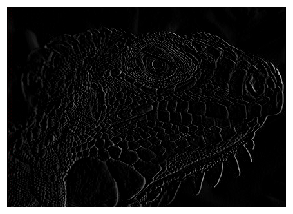

In [3]:
filter = np.array(
[
    [1,0,-1]
])

image = cv2.imread('./iguana.png')
result = cv2.filter2D(image, -1, filter)
display(result)

# Exercise 1
Let's try and address some of the problems that we found in lecture.

1. The image is dark, and it's hard to tell where the edges are that we found. How can we improve on this? Can we do this in a single filter?
2. The algorithm finds lots of edges, but we don't care about all of them. Could we keep only the brightest edges somehow? 
3. We used a horizontal derivative filter. Create and run a vertical derivative filter. Should it look similar? Does it? Find an image where the horizontal and vertical derivative filters produce very different output.
4. How does the derivative filter respond to noise? Load and run the filter on the noisy_einstein image. Can you improve on this result?


## # 1

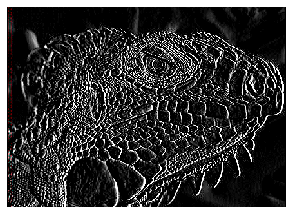

In [8]:
filter = np.array(
[
    [6,0,-6]
])

edges = cv2.imread('./iguana.png')
result = cv2.filter2D(edges, -1, filter)
display(result)

## # 2

In [9]:
from skimage import filters

<class 'numpy.int64'> (310, 433, 3)


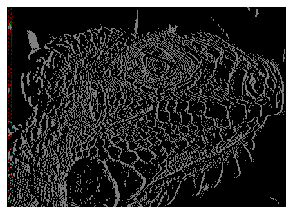

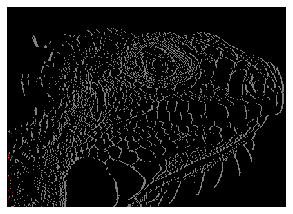

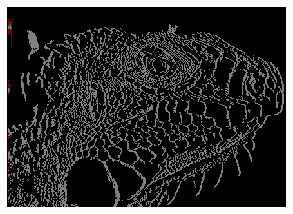

In [53]:

low = 50
high = 140

lowt = (result > low).astype(int)
hight = (result > high).astype(int)
hyst = filters.apply_hysteresis_threshold(result, low, high).astype(int)
print(type(hyst[0,0,0]), hyst.shape)
display(lowt*128)
display(hight*128)
display(hyst*128)

## # 3

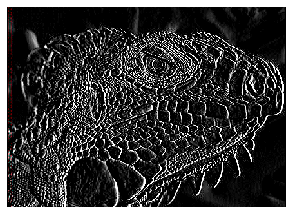

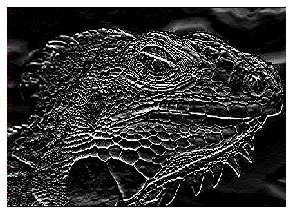

In [56]:
filter = np.array(
[
    [6],
    [0],
    [-6]
])

vert_result = cv2.filter2D(edges, -1, filter)
display(result)
display(vert_result)

The image should look slightly different because the it should show the vertical changes i.e. horizontal lines strongest, rather than the vertical lines. In the resulting image you can see that the left and right sides of the scales are much dimmer, and the tops and bottoms are stronger. As a result, the eye and mouth are much more pronounced, since they are horizontal dominant features.

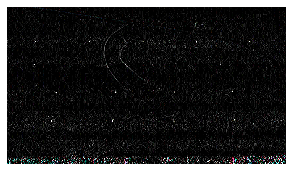

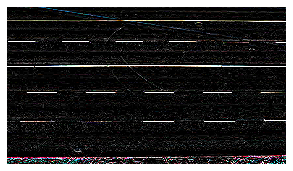

In [57]:
hfilter = np.array(
[
    [6,0,-6]
])
vfilter = np.array(
[
    [6],
    [0],
    [-6]
])

highway = cv2.imread('./highway.jpeg')
highway_h = cv2.filter2D(highway, -1, hfilter)
display(highway_h)
highway_v = cv2.filter2D(highway, -1, vfilter)
display(highway_v)

Because this photo is mostly composed of horizontal lines, the horizontal filter doesn't catch much, but the vertical filter sees horizontal lane markings.

## # 4

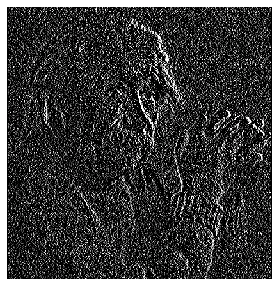

In [60]:
einstein = cv2.imread('./noisy_einstein.png')
einstein_h = cv2.filter2D(einstein, -1, hfilter)
display(einstein_h)

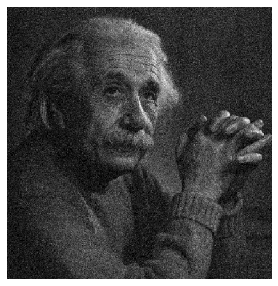

In [61]:
display(einstein)

In [62]:
blurfilter = np.array(
[
    [1/256,4/256,6/256,4/256,1/256],
    [4/256,16/256,24/256,16/256,4/256],
    [6/256,24/256,36/256,24/256,6/256],
    [4/256,16/256,24/256,16/256,4/256],
    [1/256,4/256,6/256,4/256,1/256]
])
blurstein = cv2.filter2D(einstein, -1, blurfilter)
blurstein_h = cv2.filter2D(blurstein, -1, hfilter)

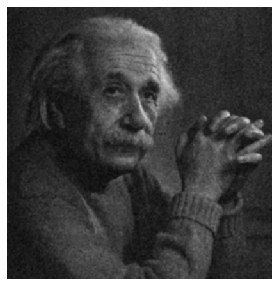

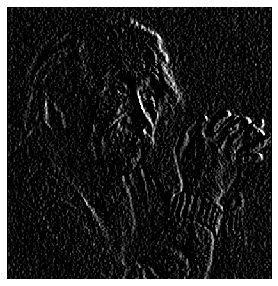

In [63]:
display(blurstein)
display(blurstein_h)

In [64]:
filter11 = np.array([
    [1, 6, 15, 20, 15, 6, 1]
])
filter11 = np.outer(filter11, filter11)
filter11 = filter11/filter11.sum()

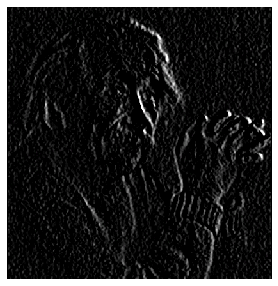

In [70]:
bigblurstein_h = cv2.filter2D(cv2.filter2D(einstein, -1, filter11), -1, hfilter)
display(bigblurstein_h)

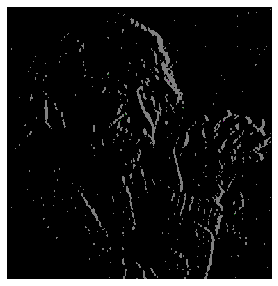

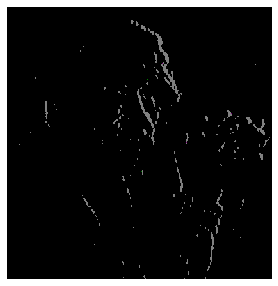

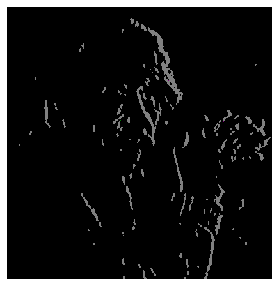

In [77]:
low = 60
high = 100

lowt = (bigblurstein_h > low).astype(int)
hight = (bigblurstein_h > high).astype(int)
hyst = filters.apply_hysteresis_threshold(bigblurstein_h, low, high).astype(int)
display(lowt*128)
display(hight*128)
display(hyst*128)